In [1]:
import pandas as pd 
import quandl
import pathlib
import yfinance as yf
import datetime
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from finquant.portfolio import build_portfolio
from finquant.moving_average import compute_ma, ema
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
quandl.ApiConfig.api_key = "GyzsN_xp1_FWKUyqZ4s5"

#ploting 
plt.style.use("seaborn-darkgrid")
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

## Portfolio Analyzation

In [2]:
tickers = {
    0: {"Name": "AZN", "Allocation": 10},
    1: {"Name": "PFE", "Allocation": 10},
    2: {"Name": "AAPL", "Allocation": 10},
    3: {"Name": "NVDA", "Allocation": 10},
    4: {"Name": "MSFT", "Allocation": 10},
    5: {"Name": "TSLA", "Allocation": 10},
    6: {"Name": "JPM", "Allocation": 10},
    7: {"Name": "BA", "Allocation": 10},
    8: {"Name": "WMT", "Allocation": 10},
    9: {"Name": "DIS", "Allocation": 10},
}
pf_allocation = pd.DataFrame.from_dict(tickers, orient="index")
names = pf_allocation["Name"].values.tolist()
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2020, 12, 1)
portfolio = build_portfolio(
    names=names, pf_allocation=pf_allocation, start_date=start_date, end_date=end_date,data_api="yfinance"
)

[*********************100%***********************]  10 of 10 completed


### Terminology 
- Expected Return 
- Volatility
- Sharpe Ratio 
- Risk Free Rate

#### Expected Return (Gain)
The expected return (or expected gain) on a financial investment is the expected value of its return (of the profit on the investment). It is a measure of the center of the distribution of the random variable that is the return.
#### Volatility
In finance, volatility is the degree of variation of a trading price series over time, usually measured by the standard deviation of logarithmic returns. 
#### Sharpe Ratio
is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
#### Risk Free Rate
In theory, the risk-free rate is the minimum return an investor expects for any investment because he will not accept additional risk unless the potential rate of return is greater than the risk-free rate.
In practice, however, a truly risk-free rate does not exist because even the safest investments carry a very small amount of risk. Thus, the interest rate on a three-month U.S. Treasury bill is often used as the risk-free rate for U.S.-based investors.
3 Month Treasury Bill Rate is at 0.08%
#### Skewness
Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.
#### Kurtosis
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. 

Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case. "When both skewness and kurtosis are zero (a situation that researchers are very unlikely to ever encounter), the pattern of responses is considered a normal distribution. A general guideline for skewness is that if the number is greater than +1 or lower than –1, this is an indication of a substantially skewed distribution. For kurtosis, the general guideline is that if the number is greater than +1, the distribution is too peaked. Likewise, a kurtosis of less than –1 indicates a distribution that is too flat. Distributions exhibiting skewness and/or kurtosis that exceed these guidelines are considered nonnormal." (Hair et al., 2017, p. 61).

In [3]:
# compute expected Return, Volatility and Sharpe Ratio

portfolio.freq = 734 # our investment period in days
portfolio.risk_free_rate = 0.08 # according to Treasury Bill Rate of the last three months. 
expected_return = portfolio.comp_expected_return(freq=734)
vol = portfolio.comp_volatility(freq=734)
sharpe = portfolio.comp_sharpe()
print("For {} trading days and a risk free rate of {}:".format(portfolio.freq, portfolio.risk_free_rate))
print("Expected return: {:0.3f}".format(expected_return))
print("Volatility: {:0.3f}".format(vol))
print("Sharpe Ratio: {:0.3f}".format(sharpe)) # Usually, any Sharpe ratio greater than 1.0 is considered acceptable
# to good by investors.A ratio higher than 2.0 is rated as very good. 
# A ratio of 3.0 or higher is considered excellent. A ratio under 1.0 is considered sub-optimal.
print("The skewness of the stocks is:\n",portfolio.skew)
print("The kurtosis of the stocks is:\n",portfolio.kurtosis)

For 734 trading days and a risk free rate of 0.08:
Expected return: 0.911
Volatility: 0.462
Sharpe Ratio: 1.797
The skewness of the stocks is:
 AZN     0.459728
PFE    -0.157431
AAPL    1.263874
NVDA    1.367187
MSFT    0.632709
TSLA    1.943015
JPM     1.005540
BA     -0.968987
WMT     0.449713
DIS     0.279234
dtype: float64
The kurtosis of the stocks is:
 AZN    -1.106396
PFE    -0.958792
AAPL    0.480822
NVDA    0.993529
MSFT   -0.858963
TSLA    2.599985
JPM     0.920201
BA     -0.553470
WMT    -0.644347
DIS    -1.129722
dtype: float64


In [4]:
# daily returns (percentage change)
daily_return= portfolio.comp_cumulative_returns().head(5)
print(daily_return)

                 AZN       PFE      AAPL      NVDA      MSFT      TSLA  \
Date                                                                     
2018-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-01-03  0.001978  0.007409 -0.000174  0.065814  0.004654 -0.010233   
2018-01-04  0.003392  0.009605  0.004470  0.071432  0.013496 -0.018438   
2018-01-05  0.013850  0.011526  0.015906  0.080511  0.026062 -0.012323   
2018-01-08  0.006783  0.000274  0.012133  0.113619  0.027109  0.049543   

                 JPM        BA       WMT       DIS  
Date                                                
2018-01-02  0.000000  0.000000  0.000000  0.000000  
2018-01-03  0.001019  0.003234  0.008723  0.004293  
2018-01-04  0.015359 -0.000573  0.009636  0.003846  
2018-01-05  0.008841  0.040426  0.015620 -0.001610  
2018-01-08  0.010331  0.044839  0.030632 -0.015921  


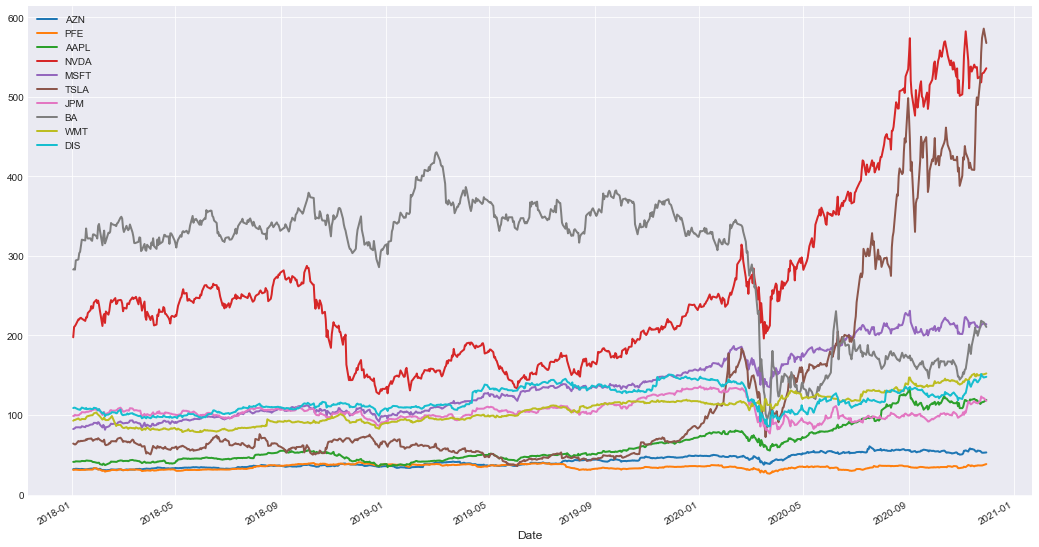

In [5]:
#plot stocks 
plt.rcParams["figure.figsize"] = (18, 10)
portfolio.data.plot()
plt.show()

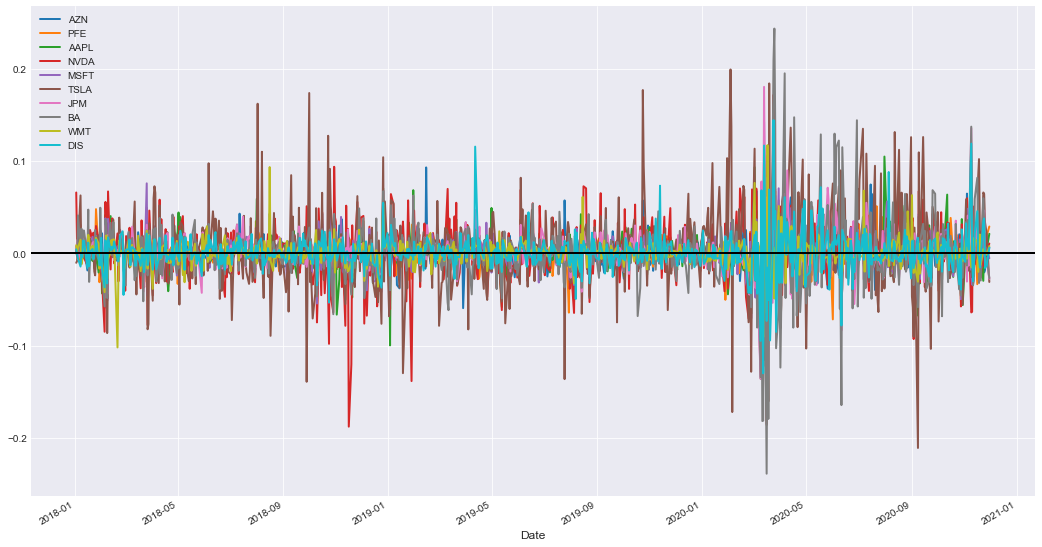

In [6]:
# plotting daily percentage changes of returns
portfolio.comp_daily_returns().plot().axhline(y=0, color="black")
plt.show()
# we can see that tesla and nvidia and disney are the most volatile stocks 

In [7]:
# buy sell signals analysis to do that Compute a band of moving averages 
# for a number of different time windows.It computes  based on crossovers of the Moving
# Averages 
spans = [5,10, 50, 100]
# get data for each stock
AZN = portfolio.get_stock("AZN").data.copy(deep=True)
PFE = portfolio.get_stock("PFE").data.copy(deep=True)
AAPL = portfolio.get_stock("AAPL").data.copy(deep=True)
NVDA = portfolio.get_stock("NVDA").data.copy(deep=True)
MSFT = portfolio.get_stock("MSFT").data.copy(deep=True)
TSLA = portfolio.get_stock("TSLA").data.copy(deep=True)
JPM = portfolio.get_stock("JPM").data.copy(deep=True)
BA = portfolio.get_stock("BA").data.copy(deep=True)
WMT = portfolio.get_stock("WMT").data.copy(deep=True)
DIS = portfolio.get_stock("DIS").data.copy(deep=True)

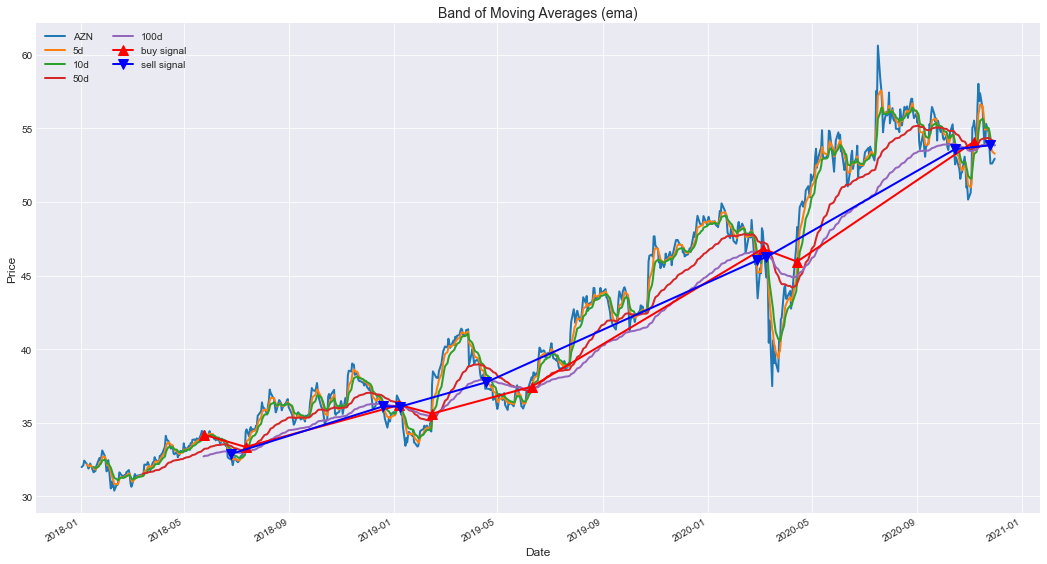

In [8]:
AZN_ma = compute_ma(AZN, ema, spans, plot=True)
plt.show()

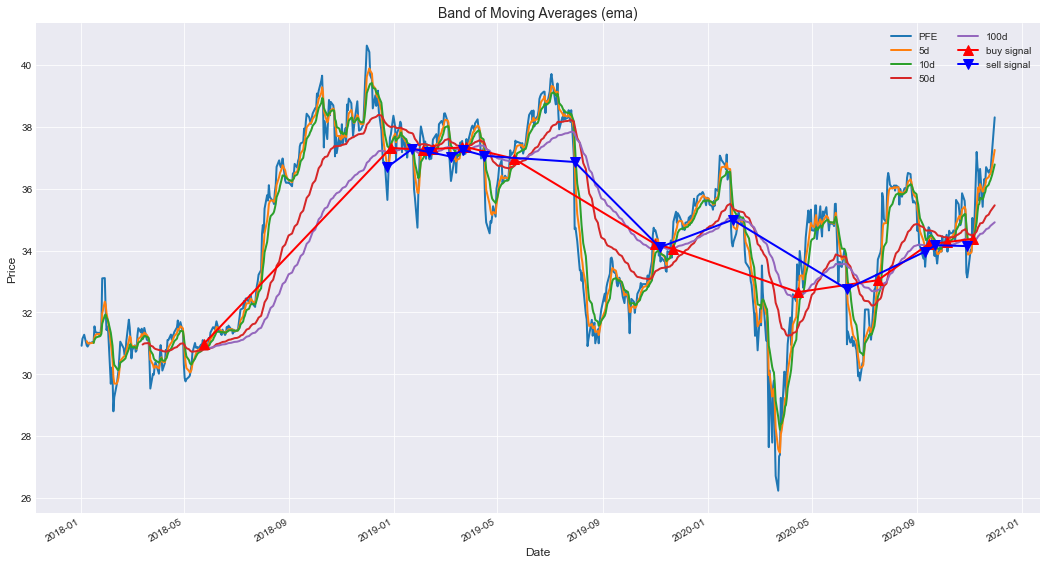

In [9]:
PFE_ma = compute_ma(PFE, ema, spans, plot=True)
plt.show()

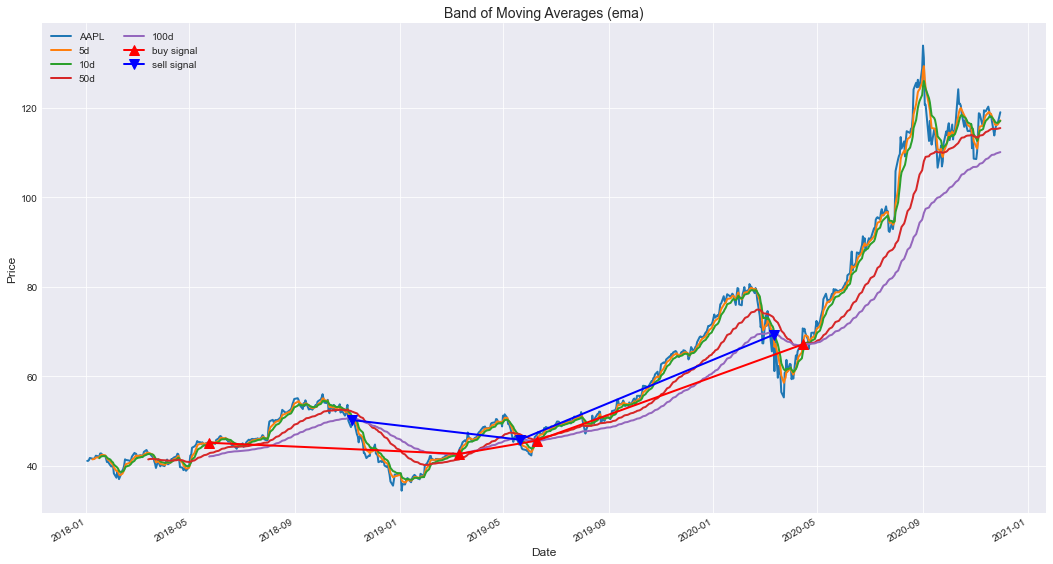

In [10]:
AAPL_ma = compute_ma(AAPL, ema, spans, plot=True)
plt.show()

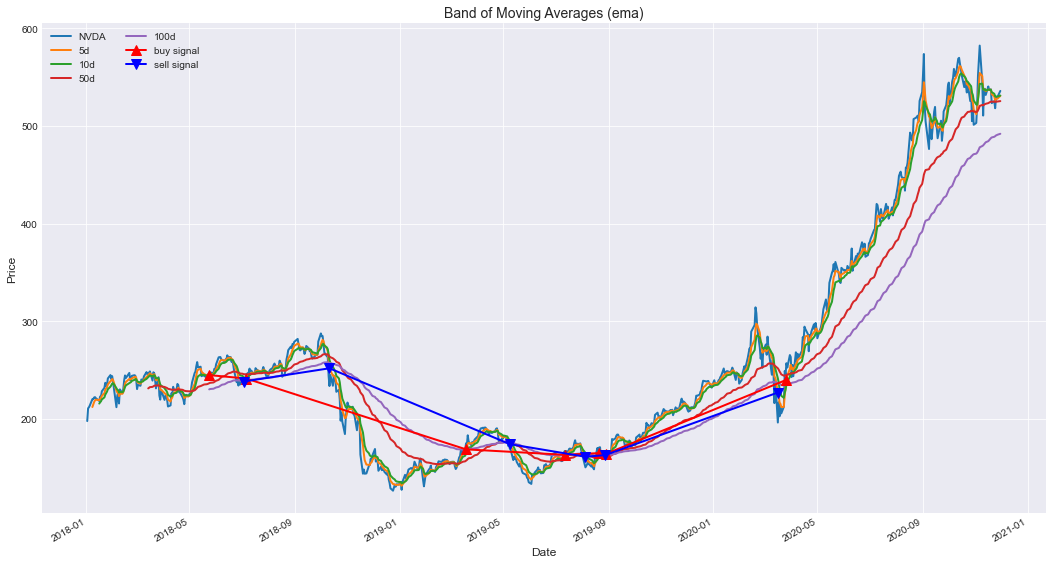

In [11]:
NVDA_ma = compute_ma(NVDA, ema, spans, plot=True)
plt.show()

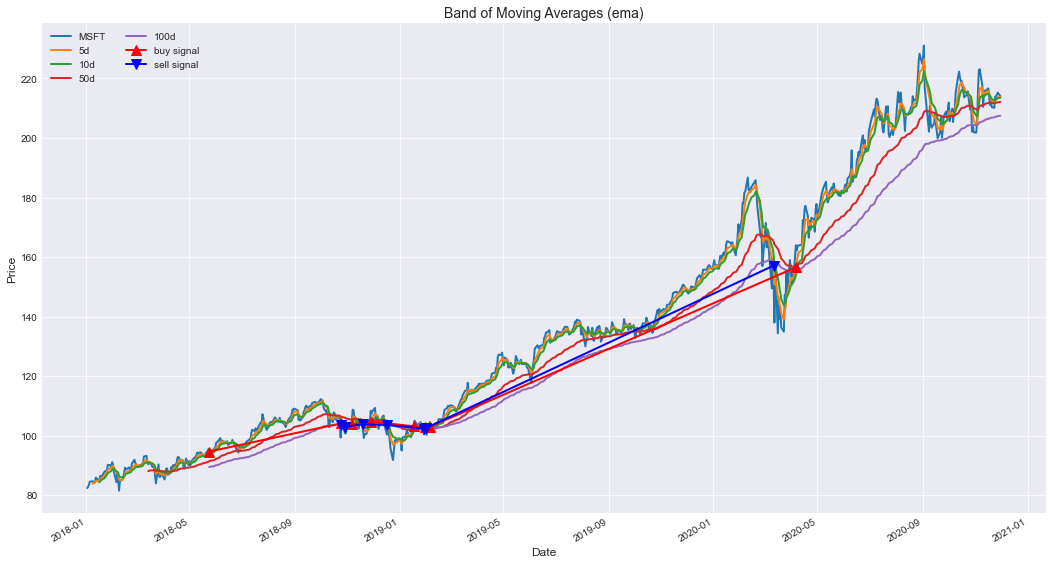

In [12]:
MSFT_ma = compute_ma(MSFT, ema, spans, plot=True)
plt.show()

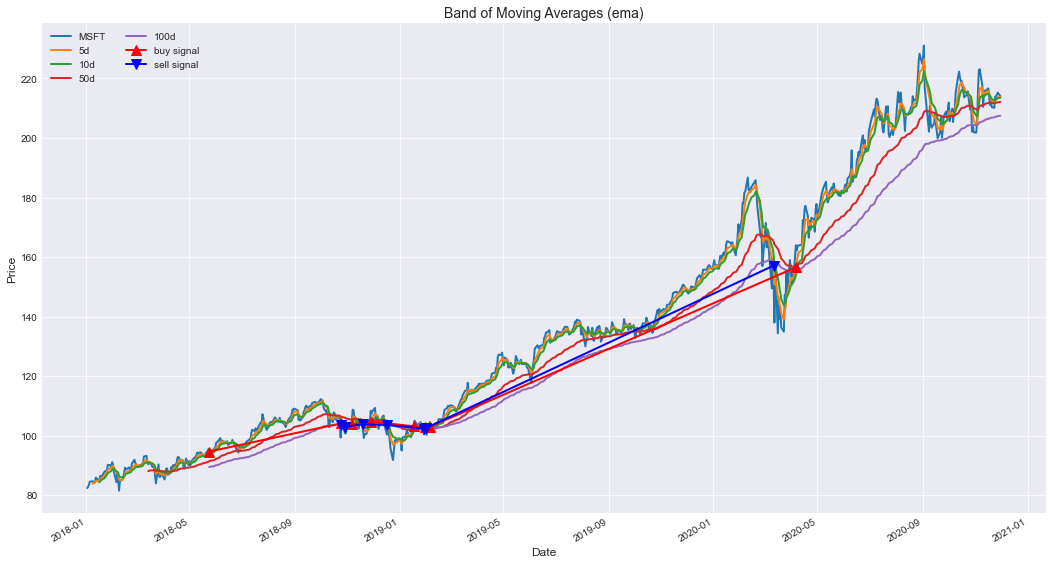

In [13]:
TSLA_ma = compute_ma(MSFT, ema, spans, plot=True)
plt.show()

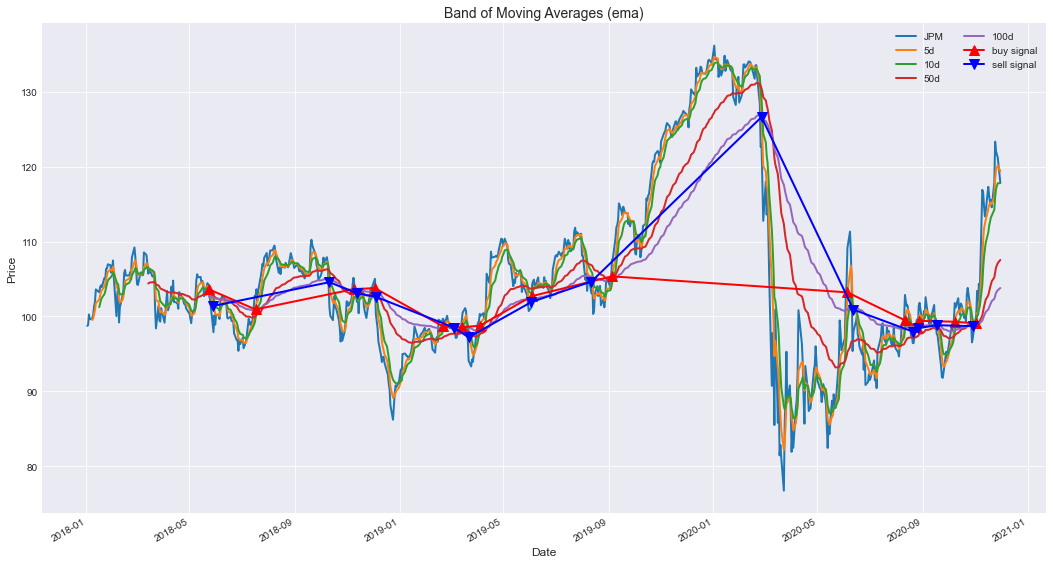

In [14]:
JPM_ma = compute_ma(JPM, ema, spans, plot=True)
plt.show()

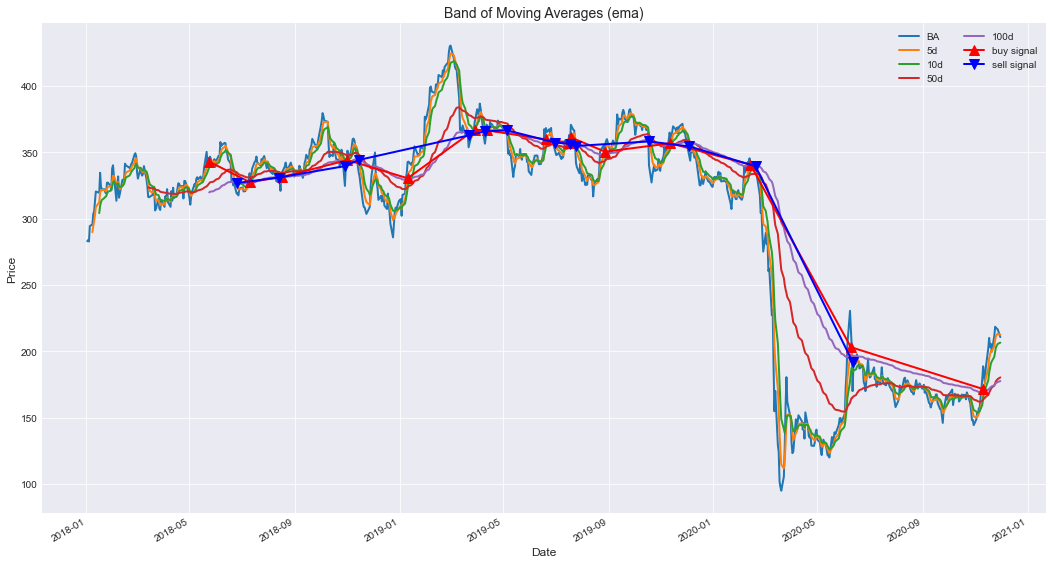

In [15]:
BA_ma = compute_ma(BA, ema, spans, plot=True)
plt.show()

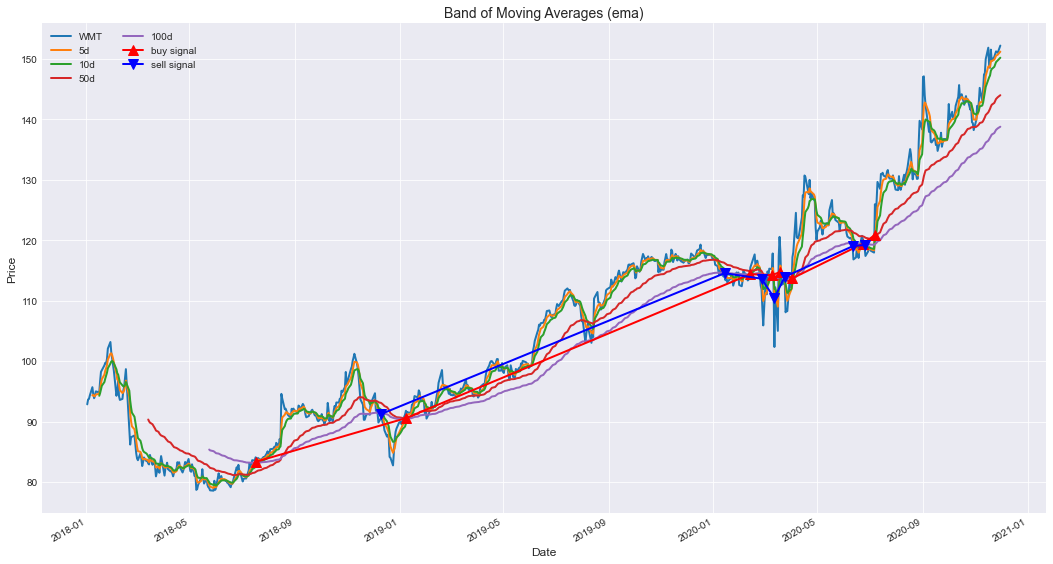

In [16]:
WMT_ma = compute_ma(WMT, ema, spans, plot=True)
plt.show()

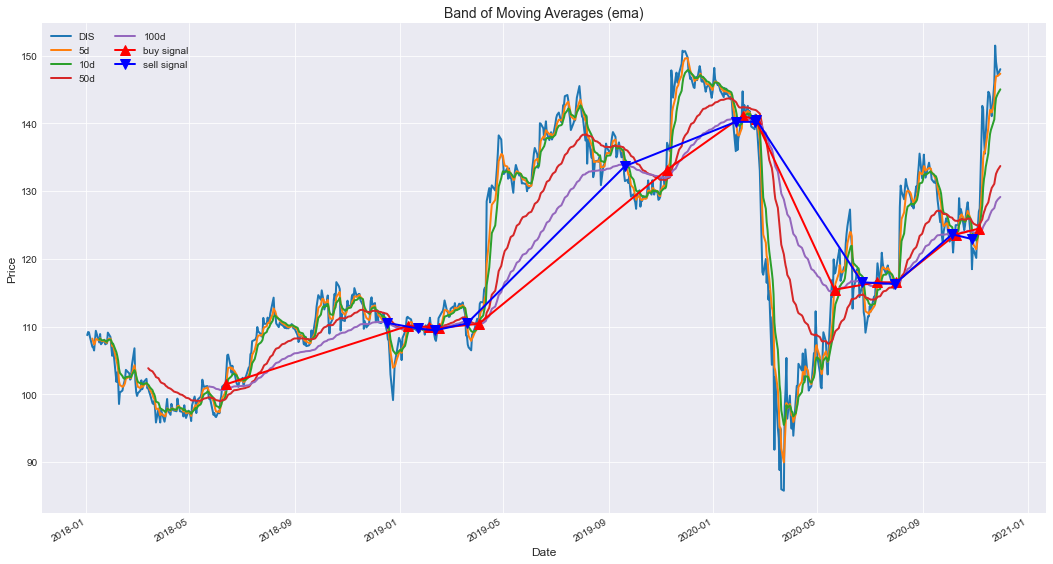

In [17]:
DIS_ma = compute_ma(DIS, ema, spans, plot=True)
plt.show()

## Portfolio Optimization

### Terminology 

- Efficient Frontier
- Monte Carlo Simulation

#### Efficient Frontier
The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return.

In [18]:
#optimum portfolio based on mimnimum volatility
print(portfolio.ef_minimum_volatility(verbose=True))

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 734
Risk free rate: 0.08
Expected annual Return: 0.514
Annual Volatility: 0.332
Sharpe Ratio: 1.308

Optimal weights:
                 AZN       PFE  AAPL          NVDA          MSFT      TSLA  \
Allocation  0.272357  0.236112   0.0  3.469447e-18  5.854692e-18  0.000958   

            JPM            BA       WMT       DIS  
Allocation  0.0  1.322727e-17  0.372915  0.117658  
----------------------------------------------------------------------
        Allocation
AZN   2.723567e-01
PFE   2.361125e-01
AAPL  0.000000e+00
NVDA  3.469447e-18
MSFT  5.854692e-18
TSLA  9.577298e-04
JPM   0.000000e+00
BA    1.322727e-17
WMT   3.729154e-01
DIS   1.176577e-01


In [19]:
#optimum portfolio based on maximum sharpe ratio
portfolio.ef_maximum_sharpe_ratio(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 734
Risk free rate: 0.08
Expected annual Return: 1.943
Annual Volatility: 0.713
Sharpe Ratio: 2.615

Optimal weights:
                 AZN  PFE      AAPL          NVDA      MSFT      TSLA  \
Allocation  0.006855  0.0  0.395786  8.147779e-17  0.019397  0.475793   

                     JPM   BA       WMT  DIS  
Allocation  9.063930e-17  0.0  0.102168  0.0  
----------------------------------------------------------------------


,Allocation
AZN,6.855347e-03
PFE,0.000000e+00
AAPL,3.957859e-01
NVDA,8.147779e-17
MSFT,1.939727e-02
TSLA,4.757930e-01
JPM,9.063930e-17
BA,0.000000e+00
WMT,1.021684e-01
DIS,0.000000e+00


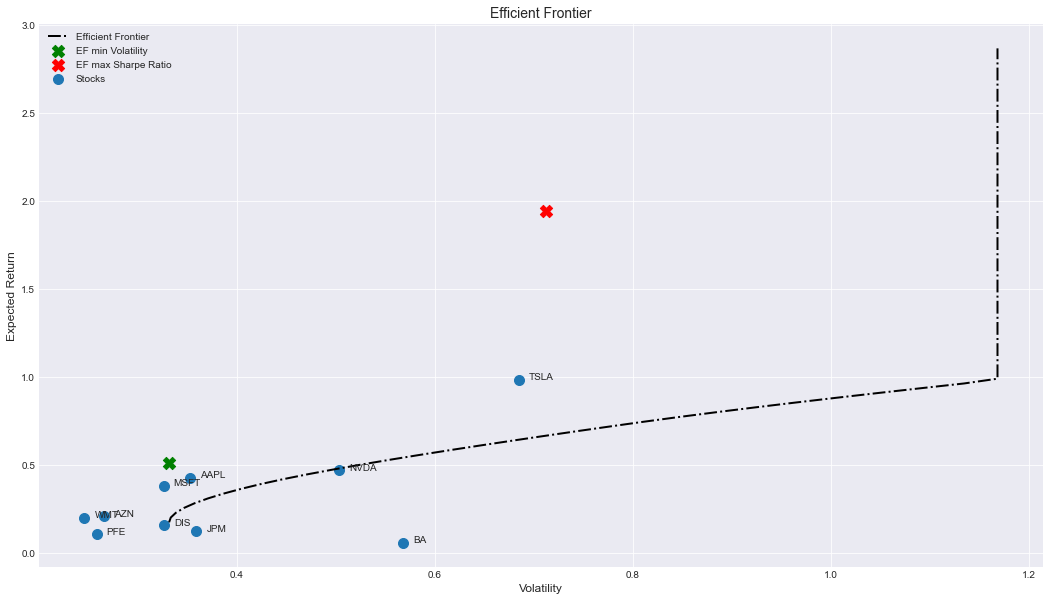

In [20]:
#plot EF
portfolio.ef_plot_efrontier()
portfolio.ef_plot_optimal_portfolios()
portfolio.plot_stocks()
plt.show()

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 734 days
Expected return: 0.615
Volatility: 0.362
Sharpe Ratio: 1.478

Optimal weights:
                AZN       PFE      AAPL      NVDA      MSFT      TSLA  \
Allocation  0.16633  0.219405  0.040643  0.053472  0.024232  0.020273   

                JPM        BA       WMT       DIS  
Allocation  0.06858  0.026156  0.253426  0.127485  
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 734 days
Expected return: 1.573
Volatility: 0.612
Sharpe Ratio: 2.440

Optimal weights:
                 AZN       PFE      AAPL      NVDA      MSFT      TSLA  \
Allocation  0.040286  0.004537  0.167468  0.033657  0.166414  0.347549   

                 JPM        BA       WMT       DIS  
Allocation  0.008509  0.005509  0.010753  0.215319  
------------------------------------------------------------

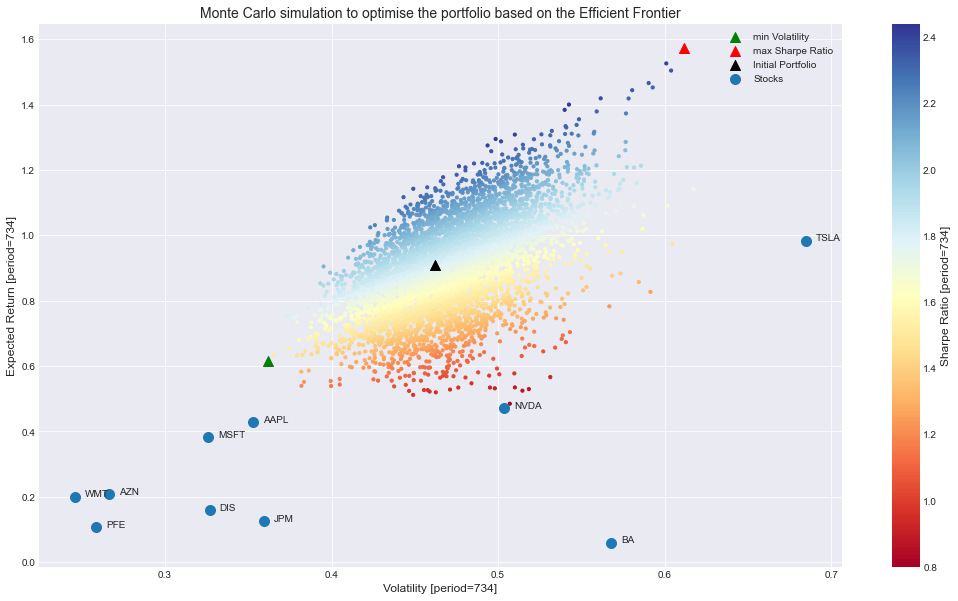

In [21]:
# plot Monte carlo 
opt_w, opt_res = portfolio.mc_optimisation(num_trials=5000)
portfolio.mc_properties()
portfolio.mc_plot_results()
portfolio.plot_stocks()
plt.show()

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 734 days
Expected return: 0.720
Volatility: 0.361
Sharpe Ratio: 1.774

Optimal weights:
                 AZN       PFE      AAPL      NVDA      MSFT     TSLA  \
Allocation  0.218267  0.205623  0.050767  0.001836  0.016241  0.07732   

                 JPM        BA       WMT       DIS  
Allocation  0.055795  0.003245  0.205872  0.165033  
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 734 days
Expected return: 1.174
Volatility: 0.451
Sharpe Ratio: 2.428

Optimal weights:
                 AZN       PFE      AAPL      NVDA      MSFT      TSLA  \
Allocation  0.198225  0.063174  0.151198  0.051006  0.027817  0.202624   

                 JPM        BA       WMT       DIS  
Allocation  0.007228  0.011133  0.213934  0.073661  
----------------------------------------------------------

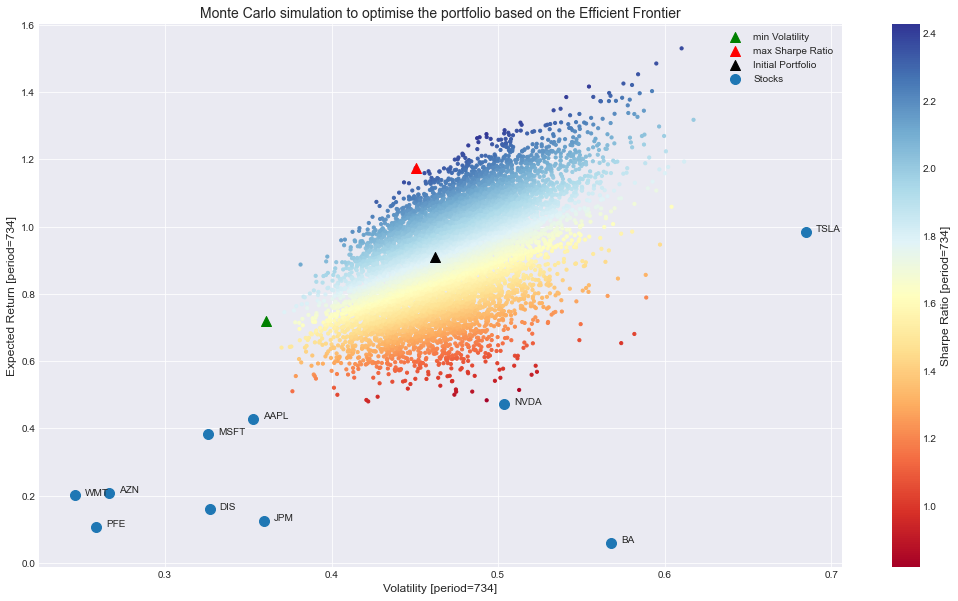

In [22]:
# plot Monte carlo 
opt_w, opt_res = portfolio.mc_optimisation(num_trials=10000)
portfolio.mc_properties()
portfolio.mc_plot_results()
portfolio.plot_stocks()
plt.show()

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 734 days
Expected return: 0.620
Volatility: 0.360
Sharpe Ratio: 1.499

Optimal weights:
                 AZN       PFE      AAPL      NVDA      MSFT      TSLA  \
Allocation  0.332122  0.091562  0.009828  0.053515  0.046632  0.008199   

                 JPM       BA     WMT       DIS  
Allocation  0.094038  0.00108  0.2159  0.147123  
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 734 days
Expected return: 1.435
Volatility: 0.525
Sharpe Ratio: 2.582

Optimal weights:
                 AZN       PFE      AAPL      NVDA      MSFT    TSLA  \
Allocation  0.180639  0.027765  0.252783  0.012145  0.103483  0.2749   

                 JPM        BA       WMT       DIS  
Allocation  0.008478  0.003257  0.124965  0.011584  
------------------------------------------------------------------

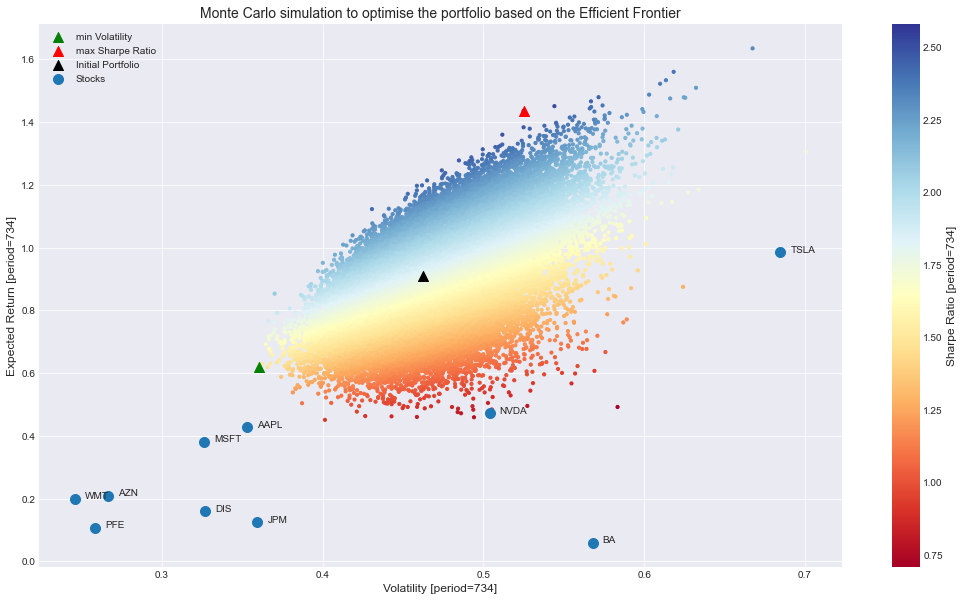

In [23]:
# plot Monte carlo 
opt_w, opt_res = portfolio.mc_optimisation(num_trials=50000)
portfolio.mc_properties()
portfolio.mc_plot_results()
portfolio.plot_stocks()
plt.show()